<a href="https://colab.research.google.com/github/gulistanburtek/machine-learning/blob/main/week_9_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.ensemble as ske                          # Tüm sınıflandırıcıları içeren kütüphane.
from sklearn.model_selection import train_test_split    # Veriyi TRAIN/TEST olarak bölmek için.
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv("/content/drive/MyDrive/machine learning /dataset/smoking.csv")

In [5]:
label_encoder = LabelEncoder()
mxscaler = MinMaxScaler()
data.head(10)

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
5,5,M,30,180,75,85.0,1.2,1.2,1.0,1.0,...,16.2,1.0,1.2,18.0,27.0,33.0,Y,0,Y,0
6,6,M,40,160,60,85.5,1.0,1.0,1.0,1.0,...,17.0,1.0,0.7,21.0,27.0,39.0,Y,1,Y,1
7,7,M,45,165,90,96.0,1.2,1.0,1.0,1.0,...,15.0,1.0,1.3,38.0,71.0,111.0,Y,0,Y,0
8,9,F,50,150,60,85.0,0.7,0.8,1.0,1.0,...,13.7,1.0,0.8,31.0,31.0,14.0,Y,0,N,0
9,10,M,45,175,75,89.0,1.0,1.0,1.0,1.0,...,16.0,1.0,0.8,26.0,24.0,63.0,Y,0,N,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [10]:
data.describe()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,27845.500000,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,...,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,16077.039933,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,...,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,0.000000,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,13922.750000,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,27845.500000,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,41768.250000,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,55691.000000,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


# **Visualization**

0    35237
1    20455
Name: smoking, dtype: int64

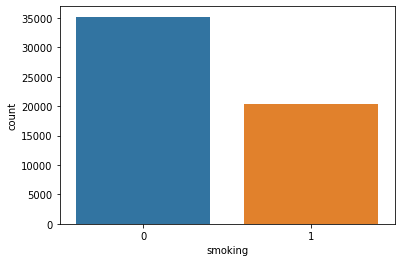

In [11]:
sns.countplot(x="smoking", data=data)
data.loc[:,'smoking'].value_counts()

[Text(0.5, 1.0, 'No. of smokers in Dataset')]

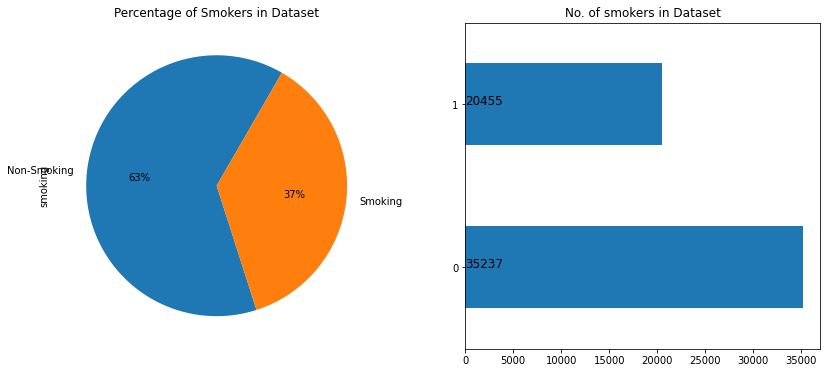

In [8]:
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(14,6))

ax1 = data['smoking'].value_counts().plot.pie(autopct = "%1.0f%%",labels = ['Non-Smoking','Smoking'],startangle = 60,ax=ax1)
ax1.set(title='Percentage of Smokers in Dataset') 

ax2 = data["smoking"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(data["smoking"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title='No. of smokers in Dataset')

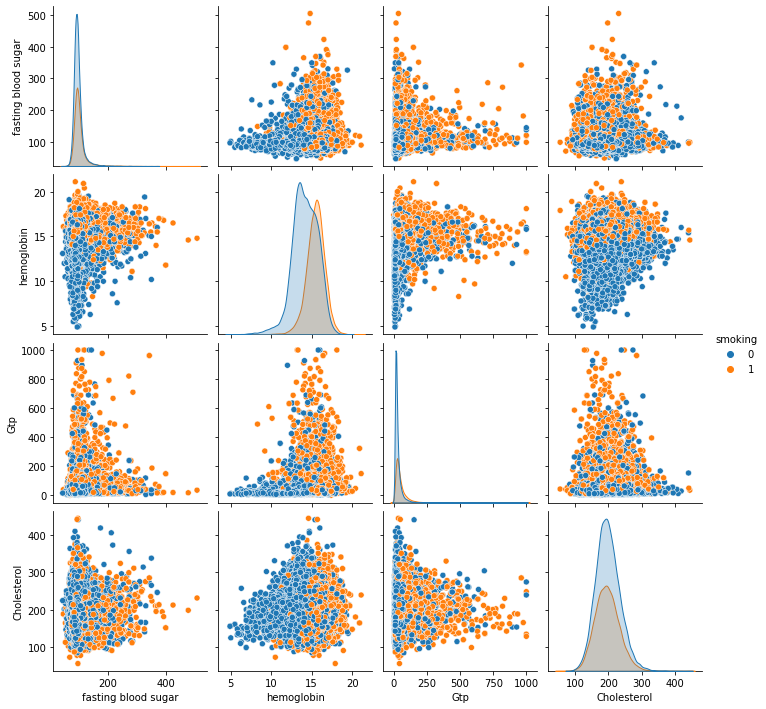

In [9]:
sns.pairplot(data, hue = 'smoking', vars = ['fasting blood sugar','hemoglobin', 'Gtp','Cholesterol'] )##Guanosine triphosphate = gtp

In [12]:
data.drop(['ID','gender','relaxation','oral','tartar','hearing(left)','hearing(right)'],axis = 1,inplace = True)

In [13]:
corr=data.corr()
corr

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
age,1.000000,-0.479528,-0.324706,-0.026297,-0.195472,-0.192723,0.134023,0.182351,0.055557,0.015102,0.007047,0.043007,-0.263078,0.029625,-0.106118,0.032576,-0.063937,0.013031,-0.114984,-0.162557
height(cm),-0.479528,1.000000,0.675656,0.378902,0.151133,0.155665,0.080585,0.019619,-0.082161,0.156693,-0.213284,-0.048419,0.539367,0.005128,0.383883,0.041737,0.126511,0.139720,0.079331,0.396675
weight(kg),-0.324706,0.675656,1.000000,0.822842,0.108433,0.113155,0.266131,0.136237,0.026403,0.324429,-0.358868,0.040560,0.492970,0.032566,0.324808,0.120130,0.250634,0.209625,0.073536,0.302780
waist(cm),-0.026297,0.378902,0.822842,1.000000,0.027458,0.037996,0.316922,0.211132,0.065467,0.361922,-0.376203,0.072817,0.387066,0.045492,0.235024,0.142690,0.252478,0.243141,0.044203,0.226259
eyesight(left),-0.195472,0.151133,0.108433,0.027458,1.000000,0.354574,-0.019330,-0.041851,-0.004985,0.019717,-0.015296,-0.007257,0.095234,-0.002752,0.071410,-0.007966,0.019326,0.003850,0.003684,0.061204
eyesight(right),-0.192723,0.155665,0.113155,0.037996,0.354574,1.000000,-0.013720,-0.044006,-0.007851,0.019881,-0.022220,-0.006172,0.096119,-0.013511,0.047608,-0.006921,0.024182,0.012195,0.016359,0.063017
systolic,0.134023,0.080585,0.266131,0.316922,-0.019330,-0.013720,1.000000,0.172700,0.059572,0.198826,-0.088487,0.016569,0.186514,0.046170,0.072288,0.083204,0.094893,0.165724,0.029894,0.073109
fasting blood sugar,0.182351,0.019619,0.136237,0.211132,-0.041851,-0.044006,0.172700,1.000000,0.009903,0.227746,-0.121274,-0.019615,0.099921,0.094047,0.041341,0.068772,0.087616,0.182414,0.001231,0.100279
Cholesterol,0.055557,-0.082161,0.026403,0.065467,-0.004985,-0.007851,0.059572,0.009903,1.000000,0.247581,0.168623,0.738975,0.061503,-0.004259,-0.000129,0.026594,0.050676,0.083531,-0.001119,-0.028548
triglyceride,0.015102,0.156693,0.324429,0.361922,0.019717,0.019881,0.198826,0.227746,0.247581,1.000000,-0.411752,0.025739,0.273353,0.033992,0.124986,0.101696,0.175164,0.301876,0.028310,0.251799


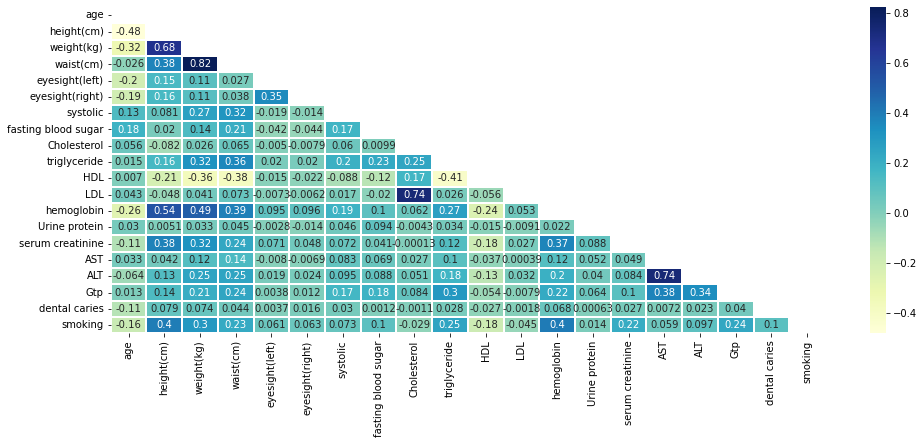

In [12]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,annot=True, linewidths=1,mask = mask, cmap="YlGnBu")

In [13]:
for i in data:
    data[i] = data[i].fillna(data[i].mean())

# **RANDOM FOREST CLASSIFIER**

In [7]:
method_names = []
method_scores = []

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100,max_depth=5,random_state = 10)
x,y = data.loc[:,data.columns != 'smoking'], data.loc[:,'smoking']
rf.fit(x,y)
prediction = rf.predict(x)
print('Prediction: {}'.format(prediction))

Prediction: [0 0 1 ... 0 0 0]


In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [17]:
rf = RandomForestClassifier(n_estimators = 10,max_depth=5,random_state = 0)
rf.fit(x_train,y_train)
prediction = rf.predict(x_test)

print("random forest algo result: ",rf.score(x_test,y_test))

random forest algo result:  0.7312066076131195


In [18]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [19]:
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 300, num = 20)]
#Number of features to consider at every split
max_features = ['auto', 'sqrt']
#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(15, 35, num = 7)]
max_depth.append(None)
#Minimum number of samples required to split a node
min_samples_split = [2, 3, 5]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
#Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                }
print(random_grid)

{'n_estimators': [100, 110, 121, 131, 142, 152, 163, 173, 184, 194, 205, 215, 226, 236, 247, 257, 268, 278, 289, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [15, 18, 21, 25, 28, 31, 35, None], 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 2, 4]}


In [20]:
param_grid = {
                'sgdclassifier__learning_rate':['constant','optimal','invscaling'],
                'sgdclassifier__eta0':[0.0,0.01,0.1,0.3,0.5,0.7],
                'sgdclassifier__alpha':[0.0001,0.001,0.01,0.1]}

In [21]:
rf = RandomForestClassifier()
rf = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                                n_iter = 50, cv = 3, verbose=2, random_state=42)
# Fit the random search model
rf.fit(x_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=215; total time=  12.3s
[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=215; total time=  11.6s
[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=215; total time=  12.1s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=236; total time=  15.9s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=236; total time=  13.9s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=236; total time=  13.8s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=278; total time=  16.3s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=27

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [15, 18, 21, 25, 28, 31,
                                                      35, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 3, 5],
                                        'n_estimators': [100, 110, 121, 131,
                                                         142, 152, 163, 173,
                                                         184, 194, 205, 215,
                                                         226, 236, 247, 257,
                                                         268, 278, 289, 300]},
                   random_state=42, verbose=2)

In [22]:
rf.best_params_

{'max_depth': 35,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 257}

In [23]:
pred = rf.predict(x_test)
print("Classification Report :\n ",classification_report(y_test,pred, zero_division=1))

Classification Report :
                precision    recall  f1-score   support

           0       0.86      0.87      0.86     10531
           1       0.77      0.75      0.76      6177

    accuracy                           0.82     16708
   macro avg       0.81      0.81      0.81     16708
weighted avg       0.82      0.82      0.82     16708



In [24]:
random_model_accuracy1 = round(rf.score(x_train, y_train)*100,2)
print(round(random_model_accuracy1, 2), '%')
random_model_accuracy2 = round(rf.score(x_test, y_test)*100,2)
print(round(random_model_accuracy2, 2), '%')

100.0 %
82.33 %


In [1]:
method_names.append("randomforest")
method_scores.append(rf.score(x_test,y_test))

NameError: ignored

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


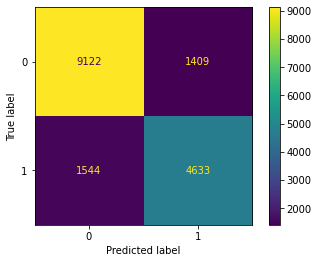

In [26]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rf,x_test,y_test)
plt.show()

# **KNN**


In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train,y_train)
prediction = knn.predict(x)

method_names.append("KNN")
method_scores.append(knn.score(x_test,y_test))

print('Prediction: {}'.format(prediction))
print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test)*100.0) # accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Prediction: [1 1 1 ... 1 1 1]
With KNN (K=3) accuracy is:  76.32870481206608


In [28]:
# Model complexity
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

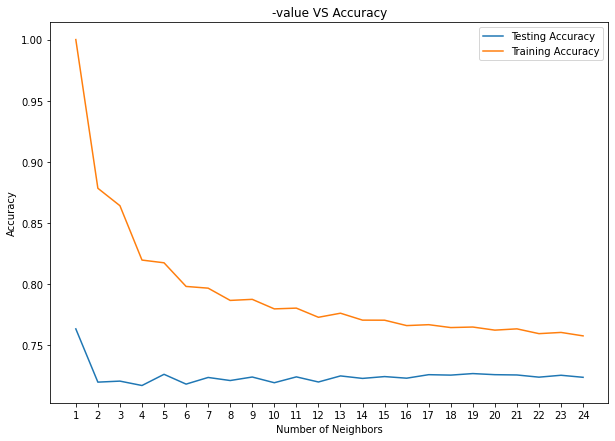

Best accuracy is 76.32870481206608  and  K = 1


In [29]:
# Plot
plt.figure(figsize=[10,7])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {}  and  K = {}".format(np.max(test_accuracy)*100.0,1+test_accuracy.index(np.max(test_accuracy))))

# **SVM**

In [56]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
 
SVM = SVC(C=10,random_state = 1)
SVM.fit(x_train,y_train)

method_names.append("SVM")
method_scores.append(SVM.score(x_test,y_test))

# predict the results
y_predtrain = SVM.predict(x_train)
y_pred_SVM = SVM.predict(x_test)

# view accuracy
print("Training Accuracy:",accuracy_score(y_train, y_predtrain))
print("Testing Accuracy:",accuracy_score(y_test, y_pred_SVM))

Training Accuracy: 0.8160783911348245
Testing Accuracy: 0.764184821642327


Text(0.5, 15.0, 'Predicted label')

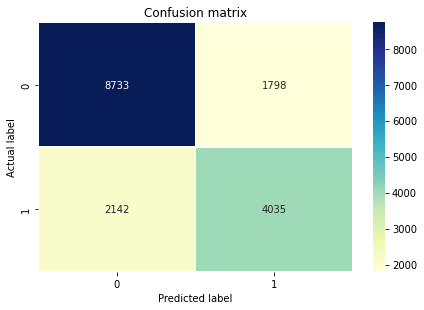

In [31]:
y_pred_SVM = SVM.predict(x_test)
y_true = y_test
cm = confusion_matrix(y_true,y_pred_SVM)

sns.heatmap(cm, annot=True,linewidths=0.5, cmap="YlGnBu" ,fmt='g')
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# **XGBOOST CLASSİFİER**

In [55]:
import xgboost as xgb
from sklearn import metrics

XGB = xgb.XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 20, alpha = 10, n_estimators = 200)  # XGBRegressor   XGBClassifier
XGB.fit(x_train,y_train)

method_names.append("XGB")
method_scores.append(XGB.score(x_test,y_test))

# predict the results
y_predtrain = XGB.predict(x_train)
y_pred_XGB = XGB.predict(x_test)

# view accuracy
print("Training Accuracy:",accuracy_score(y_train, y_predtrain)*100.0)
print("Testing Accuracy:",accuracy_score(y_test, y_pred_XGB)*100.0)

Training Accuracy: 100.0
Testing Accuracy: 81.17069667225282


Text(0.5, 15.0, 'Predicted label')

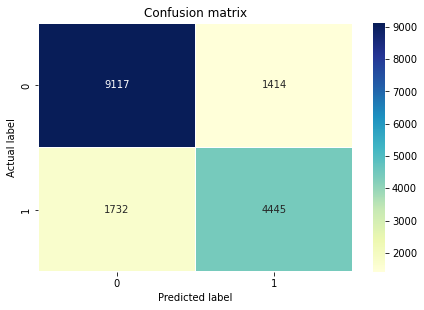

In [33]:
y_pred_XGB = XGB.predict(x_test)
y_true = y_test
cm = confusion_matrix(y_true,y_pred_XGB)

sns.heatmap(cm, annot=True,linewidths=0.5, cmap="YlGnBu" ,fmt='g')
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# **CATBOOST**

In [34]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
import catboost as cb
CAT = cb.CatBoostClassifier(max_depth=6)
CAT.fit(x_train, y_train)

method_names.append("CATBOOST")
method_scores.append(CAT.score(x_test,y_test))

# predict the results
y_predtrain = CAT.predict(x_train)
y_pred_CAT = CAT.predict(x_test)

# view accuracy
print("Training Accuracy:",accuracy_score(y_train, y_predtrain))
print("Testing Accuracy:",accuracy_score(y_test, y_pred_CAT))

Learning rate set to 0.049231
0:	learn: 0.6704346	total: 62.9ms	remaining: 1m 2s
1:	learn: 0.6514099	total: 120ms	remaining: 59.9s
2:	learn: 0.6344570	total: 179ms	remaining: 59.5s
3:	learn: 0.6189953	total: 212ms	remaining: 52.7s
4:	learn: 0.6061262	total: 227ms	remaining: 45.1s
5:	learn: 0.5948973	total: 243ms	remaining: 40.3s
6:	learn: 0.5839528	total: 282ms	remaining: 40s
7:	learn: 0.5752168	total: 302ms	remaining: 37.5s
8:	learn: 0.5669433	total: 339ms	remaining: 37.4s
9:	learn: 0.5596547	total: 380ms	remaining: 37.6s
10:	learn: 0.5535985	total: 417ms	remaining: 37.5s
11:	learn: 0.5475787	total: 449ms	remaining: 37s
12:	learn: 0.5421876	total: 474ms	remaining: 36s
13:	learn: 0.5378867	total: 490ms	remaining: 34.5s
14:	learn: 0.5337902	total: 529ms	remaining: 34.8s
15:	learn: 0.5303638	total: 563ms	remaining: 34.7s
16:	learn: 0.5270563	total: 610ms	remaining: 35.2s
17:	learn: 0.5240166	total: 649ms	remaining: 35.4s
18:	learn: 0.5214928	total: 681ms	remaining: 35.2s
19:	learn: 0.518

Text(0.5, 15.0, 'Predicted label')

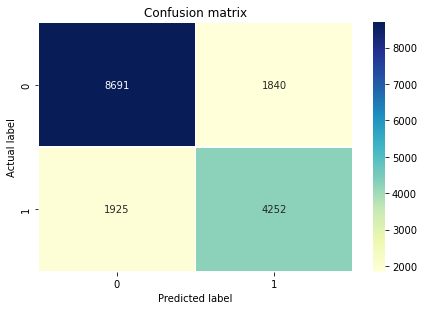

In [36]:
y_pred_CAT = CAT.predict(x_test)
y_true = y_test
cm = confusion_matrix(y_true,y_pred_CAT)

sns.heatmap(cm, annot=True,linewidths=0.5, cmap="YlGnBu" ,fmt='g')
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# **MLP**

In [51]:
from sklearn.neural_network import MLPClassifier
MLP =MLPClassifier(hidden_layer_sizes=(27), activation='relu', solver='adam', max_iter=10000,random_state=49)
MLP.fit(x_train, y_train)
accuracy = MLP.score(x_test, y_test)*100.0

method_names.append("MLP")
method_scores.append(MLP.score(x_test,y_test))

# predict the results
y_predtrain = MLP.predict(x_train)
y_pred_MLP = MLP.predict(x_test)

# view accuracy
print("Training Accuracy:",accuracy_score(y_train, y_predtrain)*100.0)
print("Testing Accuracy:",accuracy_score(y_test, y_pred_MLP)*100.0)

Training Accuracy: 76.53139749640879
Testing Accuracy: 75.72420397414412


Text(0.5, 15.0, 'Predicted label')

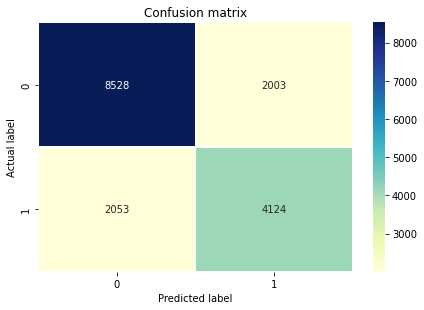

In [38]:
y_pred_MLP = MLP.predict(x_test)
y_true = y_test
cm = confusion_matrix(y_true,y_pred_MLP)

sns.heatmap(cm, annot=True,linewidths=0.5, cmap="YlGnBu" ,fmt='g')
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# **DECISION TREE**

In [50]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(criterion = "gini", random_state = 10)
dec_tree.fit(x_train,y_train)

method_names.append("DECISION TREE")
method_scores.append(dec_tree.score(x_test,y_test))

# predict the results
y_predtrain = dec_tree.predict(x_train)
y_pred_dec_tree = dec_tree.predict(x_test)

# view accuracy
print("Training Accuracy:",accuracy_score(y_train, y_predtrain)*100.0)
print("Testing Accuracy:",accuracy_score(y_test, y_pred_dec_tree)*100.0)

Training Accuracy: 100.0
Testing Accuracy: 76.33468996887719


Text(0.5, 15.0, 'Predicted label')

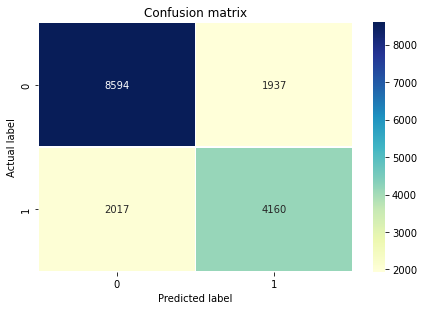

In [40]:
y_pred_dec_tree = dec_tree.predict(x_test)
y_true = y_test
cm = confusion_matrix(y_true,y_pred_dec_tree)

sns.heatmap(cm, annot=True,linewidths=0.5, cmap="YlGnBu" ,fmt='g')
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# **NAIVE BAYES**

In [49]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(x_test,y_test)

method_names.append("naive_bayes")
method_scores.append(naive_bayes.score(x_test,y_test))

# predict the results
y_predtrain = naive_bayes.predict(x_train)
y_pred_naive_bayes = naive_bayes.predict(x_test)

# view accuracy
print("Training Accuracy:",accuracy_score(y_train, y_predtrain)*100.0)
print("Testing Accuracy:",accuracy_score(y_test, y_pred_naive_bayes)*100.0)

Training Accuracy: 69.81838703057664
Testing Accuracy: 70.20588939430213


Text(0.5, 15.0, 'Predicted label')

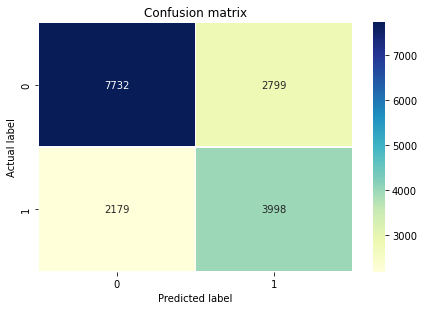

In [42]:
y_pred_naive_bayes = naive_bayes.predict(x_test)
y_true = y_test
cm = confusion_matrix(y_true,y_pred_naive_bayes)

sns.heatmap(cm, annot=True,linewidths=0.5, cmap="YlGnBu" ,fmt='g')
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# **LOGISTIC REGRESSION**

In [48]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear',class_weight='balanced')
log_reg.fit(x_train,y_train)

method_names.append("LOGISTIC REGRESSION")
method_scores.append(log_reg.score(x_test,y_test))

# predict the results
y_predtrain = log_reg.predict(x_train)
y_pred_log_reg = log_reg.predict(x_test)

# view accuracy
print("Training Accuracy:",accuracy_score(y_train, y_predtrain)*100.0)
print("Testing Accuracy:",accuracy_score(y_test, y_pred_log_reg)*100.0)

Training Accuracy: 71.93463985224707
Testing Accuracy: 72.69571462772325


Text(0.5, 15.0, 'Predicted label')

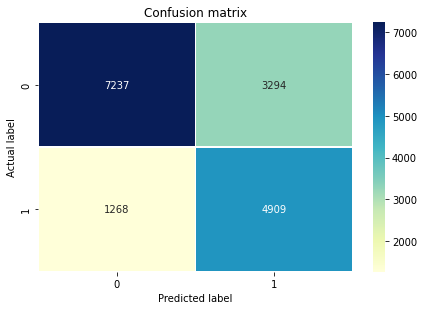

In [44]:
y_pred_log_reg = log_reg.predict(x_test)
y_true = y_test
cm = confusion_matrix(y_true,y_pred_log_reg)

sns.heatmap(cm, annot=True,linewidths=0.5, cmap="YlGnBu" ,fmt='g')
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# **ADA BOOST**

In [45]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(x_train,y_train)

method_names.append("ADA BOOST")
method_scores.append(ada.score(x_test,y_test))

# predict the results
y_predtrain = ada.predict(x_train)
y_pred_ada = ada.predict(x_test)

# view accuracy
print("Training Accuracy:",accuracy_score(y_train, y_predtrain)*100.0)
print("Testing Accuracy:",accuracy_score(y_test, y_pred_ada)*100.0)

Training Accuracy: 74.27662630822903
Testing Accuracy: 74.61096480727795


Text(0.5, 15.0, 'Predicted label')

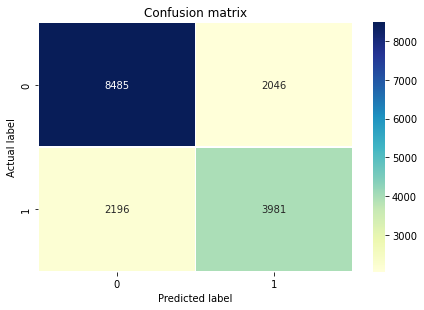

In [46]:
y_pred_ada = ada.predict(x_test)
y_true = y_test
cm = confusion_matrix(y_true,y_pred_ada)

sns.heatmap(cm, annot=True,linewidths=0.5, cmap="YlGnBu" ,fmt='g')
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0, 0.5, 'Method Score')

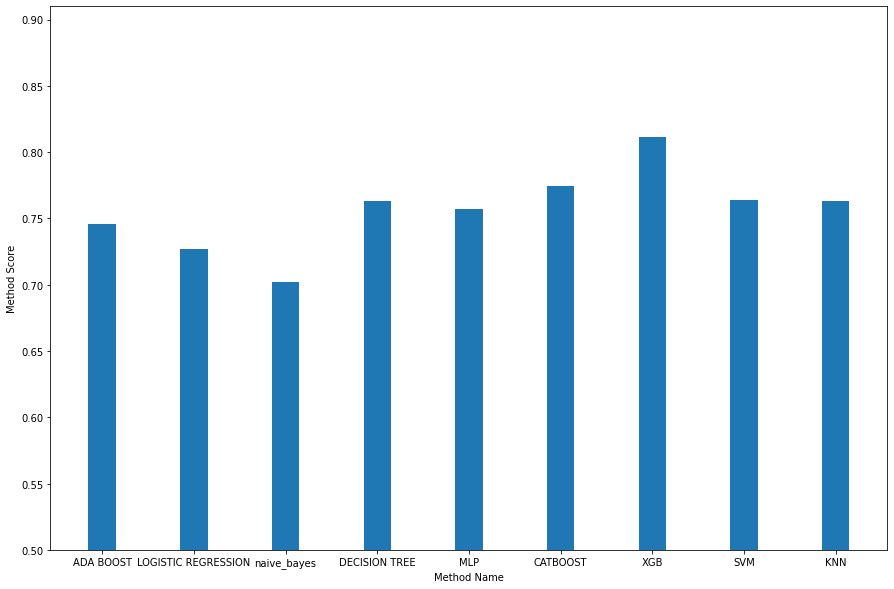

In [58]:
plt.figure(figsize=(15,10))
plt.ylim([0.5,0.91])
plt.bar(method_names,method_scores,width=0.3)
plt.xlabel('Method Name')
plt.ylabel('Method Score')